In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
bad_data = pd.read_csv('bad.csv')
good_data = pd.read_csv('good.csv')

In [3]:
# Combine the datasets
data = pd.concat([bad_data, good_data], ignore_index=True)

In [4]:
# Preprocess the data
# Encode the 'class' column to binary labels
data['class'] = data['class'].map({'bad': 1, 'good': 0})

In [5]:
# Define the feature columns and the target column
features = ['method', 'path', 'body', 'single_q', 'double_q', 'dashes', 'braces', 'spaces', 'badwords']
target = 'class'

In [6]:
# One-hot encode categorical features
data_encoded = pd.get_dummies(data[features], columns=['method', 'path', 'body'])

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_encoded, data[target], test_size=0.3, random_state=42)


In [34]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [35]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [38]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.94
Precision: 0.96
Recall: 0.92
F1 Score: 0.94


In [39]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

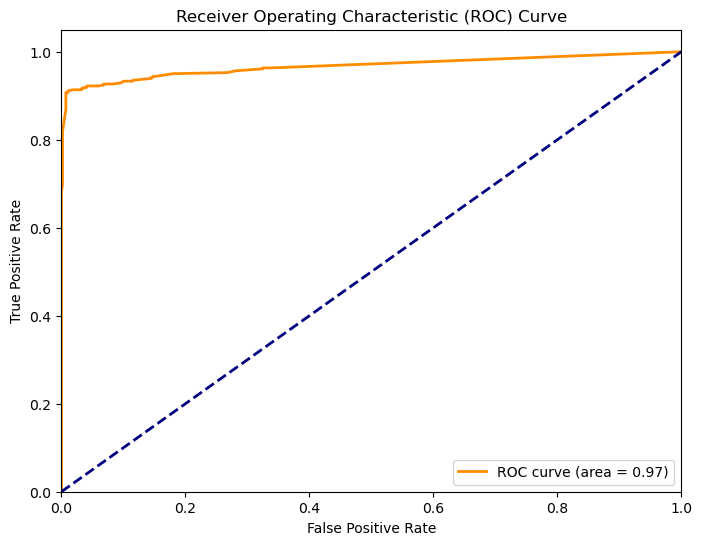

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

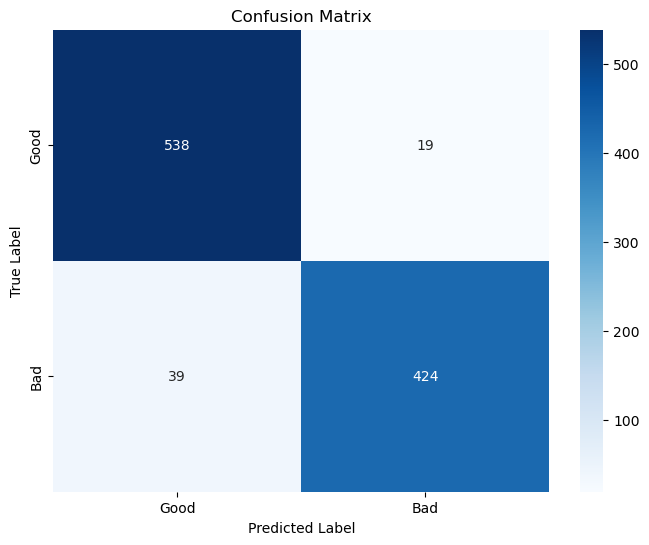

In [42]:
# Create and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [43]:
# Create a bar plot for evaluation metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

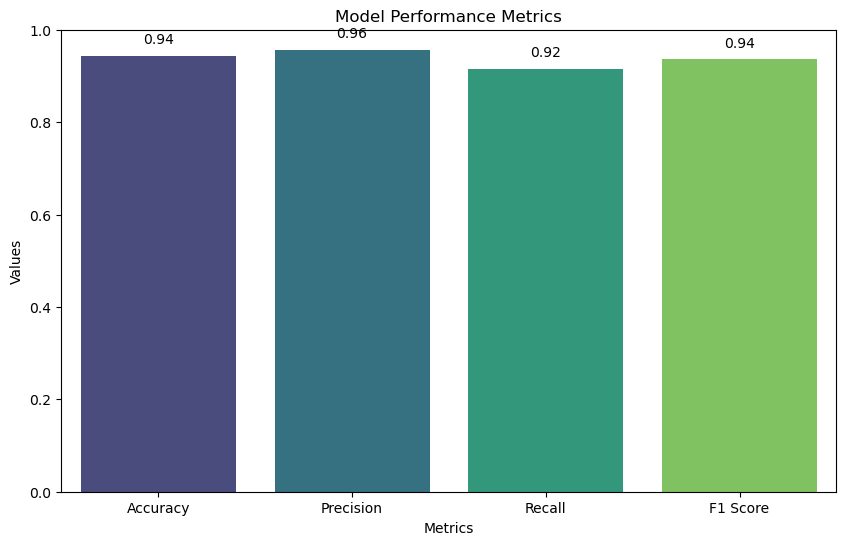

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x=metric_names, y=metric_values, palette='viridis')
plt.ylim(0, 1)
for i, value in enumerate(metric_values):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom')
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()